# Capstone Project_CAP_1

Author: Gowtham Iyer

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

## load file

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
print(dataset.shape)

(7043, 21)


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Understanding the data

In [5]:
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

## Selecting class labels, and featureset

In [6]:
X = dataset.drop(columns='Churn')
#X_sepal = pd.concat([dataset['sepal_length'], dataset['sepal_width']], axis=1)
#X_sepal_length = dataset['sepal_length']

print(X.head(), '\n')
#print(X_sepal.head(), '\n')
#print(X_sepal_length.head())

y = dataset['Churn']
y = y.replace('Yes', 1)
y = y.replace('No', 0)
print(y.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

## Understanding the dataset by plotting two features against their churn probability

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 29.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


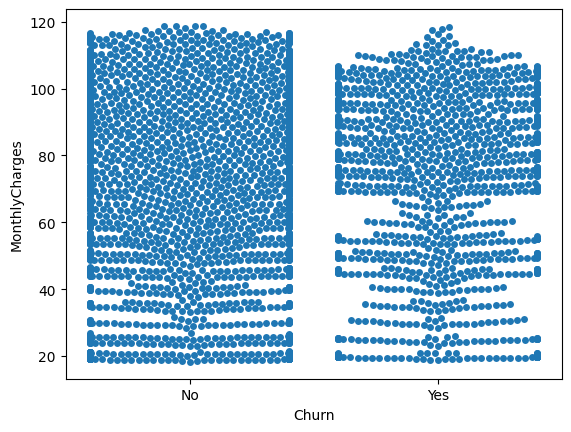

In [7]:
import seaborn as sns
# Visualising the relationship between Customer Monthly Charges and Churn probability
sns.swarmplot(x="Churn", y="MonthlyCharges", data=dataset)
plt.show()

In [8]:
# Visualising the relationship between Customer Gender and Churn probability
sns.swarmplot(x="Churn", y="gender", data=dataset)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 98.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 94.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

## Creating Logistic Reg. model and visualizing



In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#le = preprocessing.LabelEncoder()
#y_le = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_sepal_length, y_le,
                                                    test_size=0.3, random_state=0)
print(X_train.shape())
print(y_train.shape())
print(X_test.shape())
print(y_test.shape())

X_train = np.reshape(X_train.values, (-1,1))
X_test = np.reshape(X_test.values, (-1,1))

plt.scatter(X_train, y_train, c='g', marker=matplotlib.markers.CARETUP)
plt.scatter(X_test, y_test, c='b', marker=matplotlib.markers.CARETDOWN)
plt.title('sepal_length and flower class')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

NameError: name 'X_sepal_length' is not defined

In [ ]:
#X_sepal_length = np.reshape(X_sepal_length, (-1,1))
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Evaluate the performance of our model - Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

report = classification_report(y_test, y_pred)
print(report)

Accuracy of logistic regression classifier on test set: 0.69
[[14  2  0]
 [ 3 10  5]
 [ 0  4  7]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.62      0.56      0.59        18
           2       0.58      0.64      0.61        11

    accuracy                           0.69        45
   macro avg       0.68      0.69      0.68        45
weighted avg       0.69      0.69      0.69        45



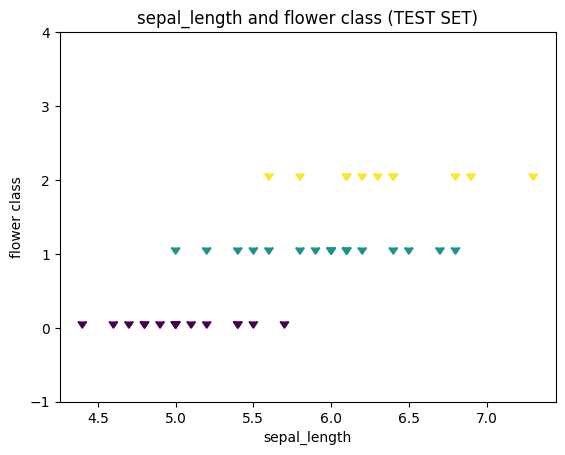

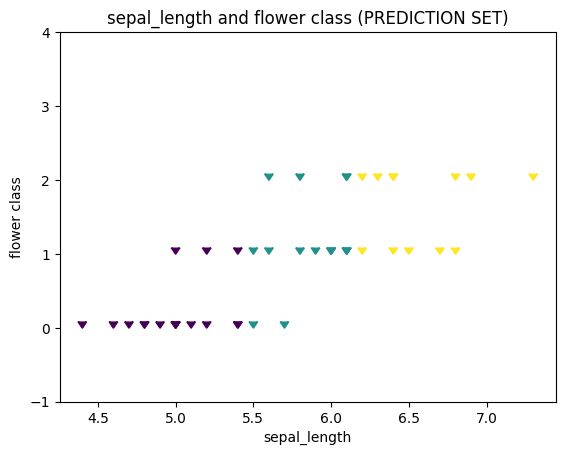

In [ ]:
# Visualising the results
plt.scatter(X_test, y_test, c=y_test, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (TEST SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()

# Visualising the results
plt.scatter(X_test, y_test, c=y_pred, marker=matplotlib.markers.CARETDOWN )
plt.title('sepal_length and flower class (PREDICTION SET)')
plt.xlabel('sepal_length')
plt.ylabel('flower class')
plt.ylim(-1,4)
plt.show()